# 소리구분
----

## 음성파일 (안녕하세요 *3)
1. data -> fft -> data_fft
2. 
 * data 구분
 * data_fft 구분
 * data, data_fft 구분
> length 를 맞춰줘야함



In [1]:
# # hello folder 를 만들고 파일을 복사
# import os
# import shutil
# file_dir = "C:/Users/User/Desktop/sound_data/wav_data/"

# if not os.path.exists(file_dir+"hello"):
#     os.mkdir(file_dir+"hello")

# for file in os.listdir(file_dir):
#     if file.endswith(tuple(".wav")):
#         shutil.copyfile(file_dir+file,file_dir+"hello/"+file)

## 1. 각각의 파일을 읽어서 fft

In [2]:
# file_list 만들기

import os
import numpy as np

file_dir = "C:/Users/User/Desktop/sound_data/wav_data/hello/"
file_list = np.array([])
for file in os.listdir(file_dir):
    file_list = np.append(file_list,file)

In [3]:
file_list

array(['권만재.wav', '배강민.wav', '엄마.wav', '조현명.wav'], dtype='<U32')

## 2. 각각의 파일을 fft로 데이터화 시킴

In [4]:
from scipy.io import wavfile

sample_list = []
sample_rate = 0
for file in file_list:
    sample_rate,sample_data = wavfile.read(file_dir+file)
    sample_list.append(sample_data)

## 3. 음성 파일 시각화

In [6]:
import matplotlib.pyplot as plt

plot_before_preprocessing = plt.figure('fig1')
for sample_data in sample_list:
    plt.plot(sample_data)


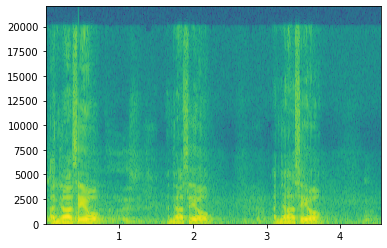

In [7]:
a = sample_list[0]
plt.specgram(a,NFFT=256,noverlap=1,Fs=44100,pad_to=1010)
plt.show()
# sample_list[0]

In [69]:
len(fftpack.fft(a,n=256))

256

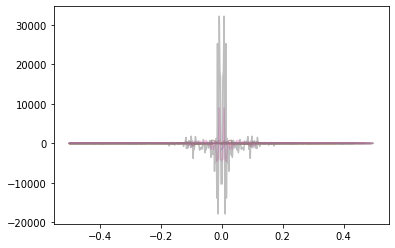

In [31]:
for i in range(2,10):
    plt.plot(fftpack.fftfreq(n=2**i),fftpack.fft(a,n=2**i),alpha=0.5)

## 4. 길이 맞춰주기

In [82]:
from keras import preprocessing

sample_list_len = np.array([])
for n in sample_list:
    sample_list_len=np.append(sample_list_len,len(n))
max_len = sample_list_len.max().astype(np.int)
    

sample_list = preprocessing.sequence.pad_sequences(sample_list, maxlen=max_len)
for i in sample_list:
    print(len(i))

200704
200704
200704
200704


## 길이 설정후 결과

In [ ]:
import matplotlib.pyplot as plt

plot_after_preprocessing = plt.figure('fig2')
for sample_data in sample_list:
    plt.plot(sample_data)

plot_before_preprocessing
plot_after_preprocessing
plt.show()

## 5. fft visualization

In [ ]:
from scipy import fftpack
for i in sample_list:
    plt.plot(fftpack.fft(i))